In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
sns.set_theme(font_scale=1.5)


from Materials import Material, Concrete, Steel
from Sections import Rectangular, Section, HollowRectangular, HollowCircular

In [2]:
frp = Material('FRP', 600e6, 80e9, 'black')
conf_steel = Steel('Confining Steel', 190e9, 355e6, 'blue')
reinf_steel = Steel('Reinforcing Steel', 190e9, 500e6, 'black')
concrete = Concrete('Concrete', 37e9, 50e6, 'gray',reinf_steel,None, 0.707878495, 2.5) # TODO

# test_section = HollowRectangular(concrete, 0.600, 0.600,0.2,0.2,0.20)

# test_outer_steel = HollowCircular(conf_steel, 0.508, 0.0125, 0.254, 0.254)
# test_concrete = HollowCircular(concrete, 0.483, 0.105, 0.254, 0.254)
# test_inner_steel = HollowCircular(conf_steel, 0.273, 0.0063, 0.254, 0.254)

# test_section = test_outer_steel+test_concrete+ test_inner_steel
title = '300x300_Original_Max_Mz_moments_z'


# test_outer_steel = HollowCircular(conf_steel, 0.3556, 0.0088, 0.1778, 0.1778)
# test_concrete = HollowCircular(concrete, 0.338, 0.04675, 0.1778, 0.1778)
# test_inner_steel = HollowCircular(conf_steel, 0.2445, 0.0063, 0.1778, 0.1778)

test_section = Rectangular(concrete, 0.3, 0.3) 
test_section.add_reinforcements(reinf_steel, 0.032, [(0.058,0.058) , (0.242,0.058) , (0.058,0.242) , (0.242,0.242)])


# test_section.add_reinforcements(reinf_steel, 0.032, [(0.075,0.075) , (0.525,0.075) , (0.075,0.525) , (0.525,0.525) , (0.225,0.075) , (0.075,0.225) , (0.525,0.225) , (0.225,0.525) , (0.375,0.075) , (0.075,0.375) , (0.375,0.525) , (0.525,0.375)
#        ])

# test_section = HollowRectangular(concrete, 0.600, 0.600,0.28,0.28,0.16)
# test_section.add_reinforcements(reinf_steel, 0.032, [(0.058,0.058) , (0.542,0.058) , (0.058,0.542) , (0.542,0.542) , (0.219333333333333,0.058) , (0.058,0.219333333333333) , (0.542,0.219333333333333) , (0.219333333333333,0.542) , (0.380666666666667,0.058) , (0.058,0.380666666666667) , (0.380666666666667,0.542) , (0.542,0.380666666666667)
# ]) 

# test_section = Rectangular(concrete, 0.600, 0.600)

# test_outer_steel = HollowRectangular(outer_confining_steel, 0.14, 0.26, 0.1274, 0.2474, 0.0063, 0, 0)
# test_concrete = Rectangular(concrete, 0.1274, 0.2474, 0.0063, 0.0063)
# test_section = test_outer_steel + test_concrete + test_inner_steel



In [3]:
test_section.generate_slices()
# test_section.slices.reinf_steel_area.sum()
test_section.confinement_and_second_order_effect (4.6, 1000000, 29130000, -14390000 )# TODO
test_section.calculate_neutral_axis( 1000000, 0.0088) # TODO
print("Neutral axis:", test_section.neutral_axis)
test_section.slices.to_csv("output.csv")
test_section.slices



0.0 0.3
0.1681994813105757
Neutral axis: 0.15075902139367706


,height,mid_height,concrete_area,reinf_steel_area,conf_steel_area,strain,concrete_stress,reinf_steel_stress,conf_steel_stress,concrete_force,reinf_steel_force,conf_steel_force,total_force,total_moment
0,0.0005,0.00025,0.00015,0.0,0.0,0.003494,2.833333e+07,0.0,0,4250.0,0.0,0,4250.0,636.4375
1,0.0010,0.00075,0.00015,0.0,0.0,0.003483,2.833333e+07,0.0,0,4250.0,0.0,0,4250.0,634.3125
2,0.0015,0.00125,0.00015,0.0,0.0,0.003471,2.833333e+07,0.0,0,4250.0,0.0,0,4250.0,632.1875
3,0.0020,0.00175,0.00015,0.0,0.0,0.003459,2.833333e+07,0.0,0,4250.0,0.0,0,4250.0,630.0625
4,0.0025,0.00225,0.00015,0.0,0.0,0.003448,2.833333e+07,0.0,0,4250.0,0.0,0,4250.0,627.9375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.2980,0.29775,0.00015,0.0,0.0,-0.003413,0.000000e+00,0.0,0,0.0,0.0,0,0.0,-0.0000
596,0.2985,0.29825,0.00015,0.0,0.0,-0.003424,0.000000e+00,0.0,0,0.0,0.0,0,0.0,-0.0000
597,0.2990,0.29875,0.00015,0.0,0.0,-0.003436,0.000000e+00,0.0,0,0.0,0.0,0,0.0,-0.0000
598,0.2995,0.29925,0.00015,0.0,0.0,-0.003447,0.000000e+00,0.0,0,0.0,0.0,0,0.0,-0.0000


In [4]:
print(test_section.second_moments_of_area)
print(f"Characteristic force plastic: {test_section.characteristic_force_plastic:.2f}[N]")
print(f"Design Force Plastic: {(test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength):.2f} [N]")

if test_section.conf_steel is not None:
    print(f"Relative Slenderness: {test_section.relative_slenderness:.2f}[-]")
    print(f"Ratio of buckling and applied load, if less than 10 2nd order effect needs to be considered: {test_section.elastic_buckling_load_to_applied_ratio:.2f}[-]")
    print(f"e/d: {test_section.eccentricity_depth:.2f}[-]")
    print(f"eta_a: {test_section.confined_factor_h_a:.2f}[-]")
    print(f"eta_c: {test_section.confined_factor_h_c:.2f}[-]")
    print(f"eta_c: {test_section.confined_factor_h_c:.2f}[-]")
    print(f"Second Order Moment Unconfined: {test_section.second_order_moment:.2f}[Nm]")
    print(f"First Order Moment Unconfined - modified: {test_section.first_order_moment_modified:.2f}[Nm]")
    print(f"Design Moment Unconfined (including 2nd order): {test_section.second_order_effect_design_moment_M_ed:.2f}[Nm]")
else:
    print(f"Slenderness Unconfined: {test_section.slenderness_unconf:.2f}[-]")
    print(f"Limit Slenderness Unconfined: {test_section.slenderness_limit_unconf:.2f}[-]")
    print(f"Factor_a: {test_section.factor_a:.2f}[-]")
    print(f"Second Order Moment Unconfined: {test_section.second_order_moment:.2f}[Nm]")
    print(f"First Order Moment Unconfined: {test_section.first_order_moment_modified :.2f}[Nm]")
    print(f"Design Moment Unconfined (including 2ndorder): {test_section.second_order_effect_design_moment_M_ed:.2f}[Nm]")



#     print(test_section.deflection_e_2)


    
    



{Concrete: {'Ixx': 0.0006747947730955828, 'Iyy': 0.0006747947730955828, 'Ixy': 2.6006238615497e-20}, Reinforcing Steel: {'Ixx': 2.052269044170738e-07, 'Iyy': 2.0522690441707374e-07, 'Ixy': 9.667673409213511e-24}}
Characteristic force plastic: 5945321.54[N]
Design Force Plastic: 3855444.21 [N]
Slenderness Unconfined: 52.17[-]
Limit Slenderness Unconfined: 74.27[-]
Factor_a: 1.06[-]
Second Order Moment Unconfined: 97941.44[Nm]
First Order Moment Unconfined: 11722000.00[Nm]
Design Moment Unconfined (including 2ndorder): 11819941.44[Nm]


In [5]:
# print(f"Sum Moment: {test_section.slices.total_moment.sum():.2f} Nm")
# print(f"Sum Concrete Area: {test_section.slices.concrete_area.sum():.6f} m^2")
# print(f"Sum Reinforceing Steel Area: {test_section.slices.reinf_steel_area.sum():.6f} m^2")
# print(f"Sum Confining Steel Area: {test_section.slices.conf_steel_area.sum():.6f} m^2")
# print(f"Sum Force: {test_section.slices.total_force.sum():.2f} Nm")
# print(f"Total Force: {test_section.slices.total_force.sum():.2f} Nm")
# print(f"Ratio of reinforcement area to concrete area(ρs): {(test_section.slices.reinf_steel_area.sum())  / test_section.slices.concrete_area.sum():.4f} -")
# # For reinforced sections
# print(f"Maximum Design Plastic Resistance (Axial Force): {(test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength):.2f} N")
# print(f"Characteristic Plastic Resistance (Axial Force): {(test_section.slices.concrete_area.sum() * concrete.characteristic_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength):.2f} N")

# pd.DataFrame.from_dict({
#     "Total Concrete Area [m2]": test_section.slices.concrete_area.sum(),
#     "Total Reinforceing Steel Area [m2]": test_section.slices.reinf_steel_area.sum(),
#     "Total Confining Steel Area [m2]": test_section.slices.reinf_steel_area.sum(),
#     "Ratio of reinforcement area to concrete area (ρs)": (test_section.slices.reinf_steel_area.sum()  / test_section.slices.concrete_area.sum()),
#     "Sum moment": test_section.slices.total_moment.sum()}, orient='index')

if test_section.conf_steel is not None:
    table = pd.DataFrame.from_dict({
    "Total Concrete Area [m2]": test_section.slices.concrete_area.sum(),
    "Total Reinforceing Steel Area [m2]": test_section.slices.reinf_steel_area.sum(),
    "Total Confining Steel Area [m2]": test_section.slices.conf_steel_area.sum(),
    "Neutral axis [m]": test_section.neutral_axis,
    "Ratio of reinforcement area to concrete area (ρs)": (test_section.slices.reinf_steel_area.sum()  / test_section.slices.concrete_area.sum()),
    "Sum moment": test_section.slices.total_moment.sum(),
    "Characteristic force plastic [N]": test_section.characteristic_force_plastic,
    "Design Force Plastic [N]": (test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength),
    "Relative Slenderness [-]": test_section.relative_slenderness,
    "Ratio of buckling and applied load, , [-] if less than 10 2nd order effect needs to be considered": test_section.elastic_buckling_load_to_applied_ratio,
    "e/d": test_section.eccentricity_depth,
    "eta_a": test_section.confined_factor_h_a,
    "eta_c": test_section.confined_factor_h_c,
    "Second Order Moment confined [Nm]": test_section.second_order_moment,
    "First Order Moment confined - modified [Nm]": test_section.first_order_moment_modified,
    "Design Moment confined (including 2nd order) [Nm]": test_section.second_order_effect_design_moment_M_ed
    }, orient='index', columns=[title+" Properties"])
    
else:
    table = pd.DataFrame.from_dict({ 
    "Total Concrete Area [m2]": test_section.slices.concrete_area.sum(),
    "Total Reinforceing Steel Area [m2]": test_section.slices.reinf_steel_area.sum(),
    "Total Confining Steel Area [m2]": test_section.slices.conf_steel_area.sum(),
    "Neutral axis [m]": test_section.neutral_axis,
    "Ratio of reinforcement area to concrete area (ρs)": (test_section.slices.reinf_steel_area.sum()  / test_section.slices.concrete_area.sum()),
    "Sum moment [Nm]": test_section.slices.total_moment.sum(),
    "Characteristic force plastic [N]": test_section.characteristic_force_plastic,
    "Design Force Plastic [N]": (test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength),
    "Slenderness Unconfined [-]": test_section.slenderness_unconf,
    "Factor_a": test_section.factor_a,
    "Limit Slenderness Unconfined [-]": test_section.slenderness_limit_unconf,
    "Second Order Moment Unconfined [Nm]": test_section.second_order_moment,
    "First Order Moment Unconfined [Nm]": test_section.first_order_moment_modified,
    "Design Moment Unconfined (including 2ndorder) [Nm]": test_section.second_order_effect_design_moment_M_ed
    }, orient='index', columns=[title+" Properties"])
    
table

,300x300_Original_Max_Mz_moments_z Properties
Total Concrete Area [m2],8.678817e-02
Total Reinforceing Steel Area [m2],3.211826e-03
Total Confining Steel Area [m2],0.000000e+00
Neutral axis [m],1.507590e-01
Ratio of reinforcement area to concrete area (ρs),3.700764e-02
Sum moment [Nm],2.057628e+05
Characteristic force plastic [N],5.945322e+06
Design Force Plastic [N],3.855444e+06
Slenderness Unconfined [-],5.216777e+01
Factor_a,1.056833e+00


c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\users\antig\pycharmprojects\sectionanalysis\venv\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


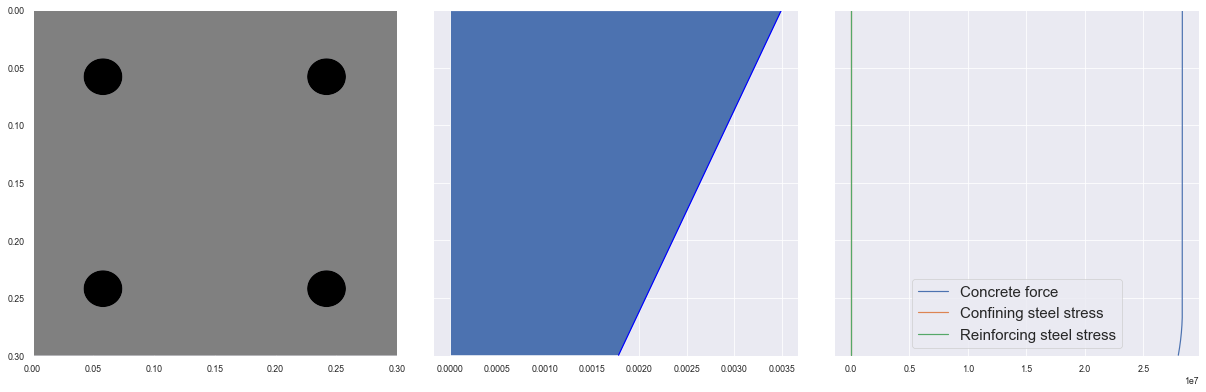

In [10]:

# left  = 0.125  # the left side of the subplots of the figure
# right = 0.125    # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

fig, axs = plt.subplots(1, 3, sharey=True, squeeze=True, figsize=(18, 6))
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":5})


                       
axs[0].invert_yaxis()
axs[0].set_ylim(0,test_section.height)
axs[0].set_xlim(0,test_section.height)
axs[0].invert_yaxis()

slices = test_section.slices
test_section.plot(axs[0])

for ax in axs:
    ax.axhline(test_section.neutral_axis, color='red')

axs[1].plot(
    slices.strain,
    slices.mid_height,
    color='blue'
    
)

axs[1].fill_betweenx(
    slices.mid_height,0,slices.strain,
    
)


axs[2].plot(
    slices.concrete_stress,
    slices.mid_height,
    label = "Concrete force"
)

axs[2].plot(
    slices.conf_steel_area,
    slices.mid_height,
    label = "Confining steel stress"
)

axs[2].plot(
    slices.reinf_steel_area,
    slices.mid_height,
    label = "Reinforcing steel stress"
)
axs[2].legend(fontsize=15)

    


# axs[3].plot(
#     slices.total_moment,
#     slices.mid_height,
#     label = "Total Moment"

# )
# axs[3].legend()

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.3)
# [ax.set_aspect('equal') for ax in axs.ravel()]

# sns.set(font_scale = 1)

plt.savefig(title+"_section.svg", format="svg")

In [7]:
test_section.generate_slices()
design_force = (test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength)
     
axial_loads = np.arange(0, (design_force+100e3), 200e3)
out = []
for axial_load in axial_loads:
    test_section.calculate_neutral_axis(axial_load, 0.0088) # TODO
    total_moment = test_section.slices.total_moment.sum()
    print(axial_load, total_moment)
    out.append({'axial_load': axial_load, 'total_moment': total_moment})
interaction_table = pd.DataFrame(out)
interaction_table

0.0 0.3
0.0 143197.1265527277
200000.0 160804.8784373484
400000.0 177173.52594853056
600000.0 191785.8140938895
800000.0 204008.4567036782
1000000.0 205762.8100509477
1200000.0 199053.43244748528
1400000.0 191322.14169530064
1600000.0 182737.1905247859
1800000.0 173077.93066212634
2000000.0 162195.81358191586
2200000.0 150176.26558228277
2400000.0 136905.9467329505
2600000.0 121988.76681437794
2800000.0 104900.36551330797
3000000.0 85657.2234252483
3200000.0 65847.46873103359
3400000.0 45709.83789117748
3600000.0 25291.710223519272
3800000.0 5277.938165734871


,axial_load,total_moment
0,0.0,143197.126553
1,200000.0,160804.878437
2,400000.0,177173.525949
3,600000.0,191785.814094
4,800000.0,204008.456704
5,1000000.0,205762.810051
6,1200000.0,199053.432447
7,1400000.0,191322.141695
8,1600000.0,182737.190525
9,1800000.0,173077.930662


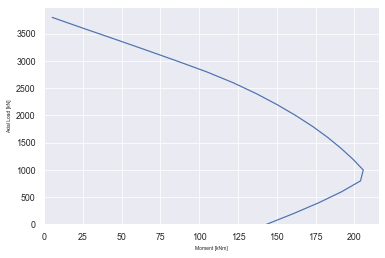

In [8]:
#interaction_table['axial_load_kn'] = interaction_table.axial_load / 1e3
interaction_table_kn = interaction_table / 1e3
g = sns.lineplot(
    data = interaction_table_kn,
    y = 'axial_load',
    x = 'total_moment',
    sort=False
)
g.set_xlabel("Moment [kNm]")
g.set_ylabel("Axial Load [kN]")
g.set_ylim([0, None])
g.set_xlim([0, None])
plt.savefig(title+"_N_M.svg", format="svg")

In [9]:
design_moment = (test_section.slices.concrete_area.sum() * concrete.design_strength + test_section.slices.reinf_steel_area.sum() * reinf_steel.characteristic_strength/1.15 + test_section.slices.conf_steel_area.sum() * conf_steel.characteristic_strength)
print (design_moment)


3855444.209788084
